In [ ]:
import json
import os
import pandas as pd

In [ ]:
data_dir="C:/Users/tsb7592/Box/Baby Toolbox Operations/Domain Teams/Language/Tobii Pilot/LWL & EF Tobii Data Export"

In [ ]:
os.chdir(data_dir)

In [ ]:
tdf= pd.read_csv('Baby Toolbox_Data_Export_06_02_2021.tsv', sep='\t') 

In [ ]:
tdf.shape

In [ ]:
keep = [col for col in tdf.columns if 'AOI' in col]
keep = [col for col in keep if 'Calib' not in col]

In [ ]:
k24 = keep[4:76]

In [ ]:
print(k24)

In [ ]:
tdf=tdf[k24]

In [ ]:
tdata = round(tdf.mean(),4).to_dict()

In [ ]:
left =[]
right=[]
away =[]
onscreen = []
i = 0
for val in tdata:
    if i%3 == 0:
        rv = tdata[val]
        left.append(tdata[val])
    elif i%3 == 1:
        rv += tdata[val]
        right.append(tdata[val])
    else:
        rv = 1 - rv
        away.append(rv)
        onscreen.append(tdata[val])
    i+=1

In [ ]:
k24[3:6]

# Read json file

In [ ]:
data_dir="C:/Users/tsb7592/Box/Baby Toolbox Operations/Domain Teams/Language/Tobii Pilot/Tobii Verbose Files/Claire"

In [ ]:
os.chdir(data_dir)

In [ ]:
df=pd.read_json('949BCA6A-D3D6-426C-9A94-E806F84E4E72@845BDD10-B9AF-4592-AA4E-0CCE76A0E8CD@00024@2021-05-11-22.11.48.356@LookListening@Claire@VerboseGazeData.json')

In [ ]:
cols=['itemID','eventName','gazeLocationName', 'gazeLocationOnScreen',"lookAtPointX", "lookAtPointY"]

In [ ]:
df=df[cols]

In [ ]:
#Finding the index for presentLiveItem and completeLiveItem to subset the pieces we need for analysis
begin =list(df[df['eventName'].str.contains('presentedLiveItem')].index)
end = list(df[df['eventName'].str.contains('completedLiveItem')].index)

In [ ]:
len(df.gazeLocationOnScreen.value_counts())

In [ ]:
expected = pd.DataFrame(
    {'Left': left,
     'Right': right,
     'Away': away,'Onscreen':onscreen
    })
expected

In [ ]:
len(end)

# Getting the counts 

In [ ]:
#tsv file
exp = pd.DataFrame(columns=('left', 'right','onScreenAway','offScreenAway'))
for i in range(24):
    lcol,rcol,wcol = k24[3*i:3*i+3]
    
    subset = tdf[tdf[wcol].notnull()]
    
    a=subset[lcol].sum()
    b=subset[rcol].sum()
    d=subset[(subset[lcol]==0) & (subset[rcol]==0) &(subset[wcol]==1)].shape[0]
    e=subset[(subset[lcol]==0) & (subset[rcol]==0) &(subset[wcol]==0)].shape[0]

    exp.loc[i] = [a, b ,d, e]

In [ ]:
#json file
obs = pd.DataFrame(columns=('L', 'R','onScreenAway','offScreenAway'))
items =[]
for i in range(len(end)):
    sub = df.iloc[begin[i]+1:end[i]]
    items.extend(sub.itemID.dropna().unique())
    a, b, c = sub.gazeLocationName.value_counts()[['left','right','away']].round(4) 
    if len(sub[sub['gazeLocationName'] == 'away'].gazeLocationOnScreen.value_counts()) == 2:
        d,e = sub[sub['gazeLocationName'] == 'away'].gazeLocationOnScreen.value_counts()
    else:
        d = c
        e = 0
    obs.loc[i] = [a, b ,d, e]

# Rewrite Lookalgorithm

In [1]:
import json
import os
import pandas as pd

In [2]:
data_dir="C:/Users/tsb7592/Box/Baby Toolbox Operations/Domain Teams/Language/Tobii Pilot/Tobii Verbose Files/Claire"

In [3]:
os.chdir(data_dir)

In [4]:
df=pd.read_json('949BCA6A-D3D6-426C-9A94-E806F84E4E72@845BDD10-B9AF-4592-AA4E-0CCE76A0E8CD@00024@2021-05-11-22.11.48.356@LookListening@Claire@VerboseGazeData.json')

In [5]:
cols=['itemID','eventName','gazeLocationName', 'gazeLocationOnScreen',"lookAtPointX", "lookAtPointY"]

In [6]:
df.columns

Index(['calibrationPoint1AverageX', 'calibrationPoint1AverageY',
       'calibrationPoint2AverageX', 'calibrationPoint2AverageY',
       'calibrationPoint3AverageX', 'calibrationPoint3AverageY',
       'calibrationPoint4AverageX', 'calibrationPoint4AverageY', 'elapsedTime',
       'eventName', 'gazeEngineState', 'gazeLocationPercentX',
       'gazeLocationPercentY', 'itemID', 'dataKey', 'dataValue',
       'arEulerAngleFaceX', 'arEulerAngleFaceY', 'arEulerAngleFaceZ',
       'arFaceAnchorTransformRow0Column0', 'arFaceAnchorTransformRow0Column1',
       'arFaceAnchorTransformRow0Column2', 'arFaceAnchorTransformRow0Column3',
       'arFaceAnchorTransformRow1Column0', 'arFaceAnchorTransformRow1Column1',
       'arFaceAnchorTransformRow1Column2', 'arFaceAnchorTransformRow1Column3',
       'arFaceAnchorTransformRow2Column0', 'arFaceAnchorTransformRow2Column1',
       'arFaceAnchorTransformRow2Column2', 'arFaceAnchorTransformRow2Column3',
       'arFaceAnchorTransformRow3Column0', 'arFaceAnc

In [7]:
df.head()

,calibrationPoint1AverageX,calibrationPoint1AverageY,calibrationPoint2AverageX,calibrationPoint2AverageY,calibrationPoint3AverageX,calibrationPoint3AverageY,calibrationPoint4AverageX,calibrationPoint4AverageY,elapsedTime,eventName,...,lookAtPointX,lookAtPointY,calibrationFocalPoint,mediaCenterPointPercentX,mediaCenterPointPercentY,cameraImageFilename,gazeLocationName,gazeLocationOnScreen,gazeLocationZoneSet,includePriorGazeLocationPoints
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,beganCalibration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000588,data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000630,data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000662,data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000689,data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import math
import numpy as np

def lookAlgorithm(df, usevals, searchTime=1.0167, margX=10, margY=15, alignX=30, alignY=30):
    '''
    Input: 
        df: the json file read to a pandas dataframe
        usevals: a string of the column name
    Output:
         results in a pandas dataframe
    '''
    
    if 'lookAtPoint' in usevals:
        useX = "lookAtPointX"
        useY = "lookAtPointY"
    elif 'arHitTestLookAtPointPosition' in usevals:
        useX = "arHitTestLookAtPointPositionX"
        useY = "arHitTestLookAtPointPositionY"
    
    startRows =list(df[df['eventName'].str.contains('presentedCalibrationItem')].index)
    endRows =list(df[df['eventName'].str.contains('completedCalibrationItem')].index)
    
    if len(startRows) != len(endRows):
        print("Early-terminated Calibration")
        return
    
    RMs=[]
    for i in range(len(startRows)):
        rollingMeans = pd.DataFrame(columns=('Cali','calibFocal', 'rowIndex','rollingX','rollingY','props')) 
        sub = df.iloc[startRows[i]:endRows[i]+1]
        firstCheck_time = df.iloc[startRows[i]]['elapsedTime'] + searchTime
        firstCheck_row = sub[sub['elapsedTime'] <= firstCheck_time].index.max()
       
        for j in range(firstCheck_row, endRows[i]+1):
            rollingMeans.loc[j] = [i,'tmp', j, -9999,-9999, -9999]
            
            useData =sub[(sub['elapsedTime'] >= df.iloc[j]['elapsedTime'] - searchTime) & (sub['elapsedTime'] <= df.iloc[j]['elapsedTime'])&(sub['elapsedTime'] >= df.iloc[startRows[i]]['elapsedTime'])]
            useData = useData[~useData.eventName.str.contains('complet')]
                              
            rollingMeans.loc[j]['calibFocal']=useData['calibrationFocalPoint'].unique()[0]
            rollingMeans.loc[j]['rollingX']=round(useData[useX].mean(),2)
            rollingMeans.loc[j]['rollingY']=round(useData[useY].mean(),2)
            rollingMeans.loc[j]['props']=round(100*(useData[(useData[useX] >= useData[useX].mean()- margX) & (useData[useX] <= useData[useX].mean()+ margX) & (useData[useY] >= useData[useY].mean()- margY) & (useData[useY] <= useData[useY].mean()+ margY)]).shape[0]/useData[useData[useY].notnull()].shape[0],2)
          
        RMs.append(rollingMeans)
         
    RMs = pd.concat(RMs, ignore_index=True)
    
    use=[]
    for i in range(4):
        ur = RMs[(RMs['props'] >= 80) & (RMs['Cali']==i)].head(1)
        use.append(ur)
    useRows = pd.concat(use)
    useRows = useRows.reset_index()
    
    #if useRows.shape[0]>4:
    useRows['calibrationSet'] =(useRows.index + 1)/4
    useRows['calibrationSet'] =useRows['calibrationSet'].apply(np.ceil)
        
    tr = useRows[useRows['calibFocal']=='topRight']['rollingX'].values[0]
    br = useRows[useRows['calibFocal']=='bottomRight']['rollingX'].values[0]
    tl = useRows[useRows['calibFocal']=='topLeft']['rollingX'].values[0]
    bl = useRows[useRows['calibFocal']=='bottomLeft']['rollingX'].values[0]    
    
    #save the 4 screenSide numbers to a dictionary 
    screenSide={}
    if abs(tr- br) <= alignX:
        screenSide['rightSide'] = max(tr, br)
    else:
        screenSide['rightSide'] = np.NaN
    
    if abs(tl- bl) <= alignX:
        screenSide['leftSide']= min(tl, bl)
    else:
        screenSide['leftSide']= np.NaN
    
    tr = useRows[useRows['calibFocal']=='topRight']['rollingY'].values[0]
    br = useRows[useRows['calibFocal']=='bottomRight']['rollingY'].values[0]
    tl = useRows[useRows['calibFocal']=='topLeft']['rollingY'].values[0]
    bl = useRows[useRows['calibFocal']=='bottomLeft']['rollingY'].values[0]
    
    if abs(tr- tl) <= alignY:
        screenSide['topSide'] = round((tr+tl)/2,2)
    else:
        screenSide['topSide'] = np.NaN
        
    if abs(br- bl) <= alignY:
        screenSide['bottomSide']= round((br+bl)/2,2)
    else:
        screenSide['bottomSide']= np.NaN   
        
    if useRows['calibFocal'].isnull().any():
        screenSide['rightSide'] = np.NaN
        screenSide['leftSide'] = np.NaN
        screenSide['topSide'] = np.NaN
        screenSide['bottomSide'] = np.NaN
 
    return RMs,useRows,screenSide

In [9]:
RM, lookDetected, ss=lookAlgorithm(df,'lookAtPoint')

In [10]:
RM

,Cali,calibFocal,rowIndex,rollingX,rollingY,props
0,0,topLeft,89,32.1,10.86,35.48
1,0,topLeft,90,31.78,10.76,33.87
2,0,topLeft,91,31.61,10.48,35.0
3,0,topLeft,92,31.4,10.57,32.79
4,0,topLeft,93,31.07,10.51,32.79
...,...,...,...,...,...,...
275,3,topRight,594,114.78,0.84,100.0
276,3,topRight,595,114.66,0.66,100.0
277,3,topRight,596,114.57,0.46,100.0
278,3,topRight,597,114.47,0.39,100.0


In [11]:
ss

{'rightSide': 113.45, 'leftSide': 25.33, 'topSide': 7.88, 'bottomSide': 16.38}

# Modify the numbers

In [13]:
def Modify_screenSide(ss, ratio= 0.45, leftright= 25, topbottom=50):
    '''
    Input: 
        ss: dictionary contains the four screensides
        leftright: the margin to modify the left/right side
        topbottom: the margin to modify the top/bottom side
        ratio: the ratio to identify left and right side
        
    Output:
        screenSide: the modified dictionary contains new four screensides
         
    '''
    
    screenSide =ss.copy()
    screenSide['rightSide'] += leftright
    screenSide['leftSide'] -= leftright
    screenSide['topSide'] -= topbottom
    screenSide['bottomSide'] += topbottom
    
    leftM = (screenSide['rightSide']-screenSide['leftSide'])*ratio
    rightM = (screenSide['rightSide']-screenSide['leftSide'])*(1-ratio)
    print('Margin for ratio: ',ratio, leftM, rightM)
    
    return screenSide

In [14]:
def Location(row, ss, ratio):
    leftM = (ss['rightSide']-ss['leftSide'])*ratio
    rightM = (ss['rightSide']-ss['leftSide'])*(1-ratio)
    if row['lookAtPointX'] > ss['leftSide'] and row['lookAtPointX'] <leftM  and row['lookAtPointY']>ss['topSide']and row['lookAtPointY']<ss['bottomSide'] :
        return 'left'
    elif row['lookAtPointX'] > rightM  and row['lookAtPointX'] <ss['rightSide'] and row['lookAtPointY']>ss['topSide']and row['lookAtPointY']<ss['bottomSide']:
        return 'right'
    else:
        return 'away'

In [15]:
def OnScreen(row, ss, ratio):
    leftM = (ss['rightSide']-ss['leftSide'])*ratio
    rightM = (ss['rightSide']-ss['leftSide'])*(1-ratio)
    if row['lookAtPointX'] >leftM and row['lookAtPointX']< rightM and row['lookAtPointY']<ss['bottomSide']and row['lookAtPointY']>ss['topSide'] :
        return 'true'
    else:
        return 'false'

In [16]:
begin =list(df[df['eventName'].str.contains('presentedLiveItem')].index)
end = list(df[df['eventName'].str.contains('completedLiveItem')].index)

In [17]:
test =df.iloc[begin[0]+1:end[0]]

In [18]:
test['NewLocation'] =test.apply( lambda row : Location(row, ss, 0.4), axis = 1)
test['NewOnScreen'] = test.apply( lambda row : OnScreen(row, ss, 0.4), axis = 1)

<ipython-input-18-528abeccbc9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['NewLocation'] =test.apply( lambda row : Location(row, ss, 0.4), axis = 1)
<ipython-input-18-528abeccbc9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['NewOnScreen'] = test.apply( lambda row : OnScreen(row, ss, 0.4), axis = 1)


In [19]:
cols=['itemID',
 'eventName',
 'gazeLocationName',
 'gazeLocationOnScreen',
 'lookAtPointX',
 'lookAtPointY','NewLocation','NewOnScreen']

In [20]:
a =test[['gazeLocationName', 'gazeLocationOnScreen','lookAtPointX','lookAtPointY']].dropna().index

In [21]:
test.loc[a][cols]

,itemID,eventName,gazeLocationName,gazeLocationOnScreen,lookAtPointX,lookAtPointY,NewLocation,NewOnScreen
606,NaN,faceVerticesChanged,left,true,61.356951,1.107581,away,false
607,NaN,faceVerticesChanged,left,true,58.411147,1.416698,away,false
608,NaN,faceVerticesChanged,left,true,47.173716,1.709210,away,false
609,NaN,faceVerticesChanged,left,true,41.147843,1.947476,away,false
611,NaN,faceVerticesChanged,left,true,38.543832,3.449706,away,false
...,...,...,...,...,...,...,...,...
1230,NaN,faceVerticesChanged,left,true,36.122445,43.810263,away,false
1231,NaN,faceVerticesChanged,left,true,36.317568,44.471174,away,false
1232,NaN,faceVerticesChanged,left,true,35.782371,43.559000,away,false
1233,NaN,faceVerticesChanged,left,true,35.018556,42.924315,away,false


In [22]:
test[cols]

,itemID,eventName,gazeLocationName,gazeLocationOnScreen,lookAtPointX,lookAtPointY,NewLocation,NewOnScreen
605,NaN,cameraImageCaptured,NaN,NaN,NaN,NaN,away,false
606,NaN,faceVerticesChanged,left,true,61.356951,1.107581,away,false
607,NaN,faceVerticesChanged,left,true,58.411147,1.416698,away,false
608,NaN,faceVerticesChanged,left,true,47.173716,1.709210,away,false
609,NaN,faceVerticesChanged,left,true,41.147843,1.947476,away,false
...,...,...,...,...,...,...,...,...
1231,NaN,faceVerticesChanged,left,true,36.317568,44.471174,away,false
1232,NaN,faceVerticesChanged,left,true,35.782371,43.559000,away,false
1233,NaN,faceVerticesChanged,left,true,35.018556,42.924315,away,false
1234,NaN,cameraImageCaptured,NaN,NaN,NaN,NaN,away,false


In [23]:
#json file

def ReProcess(data, ss, ratio):
    '''
    Input: 
        df: the json file read to a pandas dataframe
        ss: the modified dictionary contains new four screensides
        ratio: the ratio to identify left and right side
        
    Output:
         new: the pandas dataframe contains the new count 
         items: a list of the name of the N items
    '''
    #Finding the index for presentLiveItem and completeLiveItem to subset the pieces we need for analysis
    df = data.copy()

    df['NewLocation'] = df.apply( lambda row : Location(row, ss, ratio), axis = 1)
    df['NewOnScreen'] = df.apply( lambda row : OnScreen(row, ss, ratio), axis = 1)
    item_index = []

    new = pd.DataFrame(columns=('L', 'R','onScreenAway','offScreenAway'))
    items =[]
    for i in range(len(end)):
        sub = df.iloc[begin[i]+1:end[i]]
        items.extend(sub.itemID.dropna().unique())
        
        lindex=sub[['gazeLocationName', 'gazeLocationOnScreen','lookAtPointX','lookAtPointY']].dropna().index
        sub = sub.loc[lindex]
        item_index.append(lindex)
        
 
        a, b, c = sub.NewLocation.value_counts()[['left','right','away']].round(4) 
        if len(sub[sub['NewLocation'] == 'away'].NewOnScreen.value_counts()) == 2:
            d,e = sub[sub['NewLocation'] == 'away'].NewOnScreen.value_counts()
        else:
            d = c
            e = 0
        new.loc[i] = [a, b ,d, e]
     
    
    return new, df, items, item_index

In [24]:
nss= Modify_screenSide(ss, 0.40)
nss

Margin for ratio:  0.4 55.248000000000005 82.872


{'rightSide': 138.45,
 'leftSide': 0.3299999999999983,
 'topSide': -42.12,
 'bottomSide': 66.38}

In [25]:
new40, df40, items, index40 =ReProcess(df, nss, 0.4)

In [26]:
len(index40)

24

In [27]:
nss425= Modify_screenSide(ss, 0.425)
new425, df425, items, index425 =ReProcess(df, nss425, 0.425)

Margin for ratio:  0.425 58.701 79.419


In [28]:
nss45= Modify_screenSide(ss, 0.45)
new45, df45, items, index45 =ReProcess(df, nss45, 0.45)

Margin for ratio:  0.45 62.154 75.96600000000001


In [29]:
new45

,L,R,onScreenAway,offScreenAway
0,294,111,66,9
1,108,279,92,2
2,200,162,112,6
3,244,58,162,15
4,204,271,5,1
5,285,124,59,10
6,127,333,19,0
7,240,146,92,2
8,151,253,64,12
9,275,143,54,8


In [30]:
new425

,L,R,onScreenAway,offScreenAway
0,284,87,100,9
1,108,279,92,2
2,200,160,112,8
3,240,55,162,22
4,196,266,18,1
5,265,124,59,30
6,120,315,44,0
7,238,146,92,4
8,149,243,64,24
9,271,142,54,13


In [38]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('C:/Users/tsb7592/Box/Baby Toolbox Operations/Analysis/json_counts.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
new40.to_excel(writer, sheet_name='40', index=False)
new425.to_excel(writer, sheet_name='425', index=False)
new45.to_excel(writer, sheet_name='450', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline


def plot_dots(df, title, ss, nss, ratio=0.4):
    leftM = (nss['rightSide']-nss['leftSide'])*ratio
    rightM = (nss['rightSide']-nss['leftSide'])*(1-ratio)
    
    width = ss['rightSide'] - ss['leftSide']
    height = ss['bottomSide'] - ss['topSide']
    
    w1= leftM- nss['leftSide']
    h1= nss['bottomSide']- nss['topSide']
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, aspect='equal')
    
    ax1.scatter(
    x=df.lookAtPointX, y=df.lookAtPointY,alpha=0.9)

    ax1.add_patch(patches.Rectangle((nss['leftSide'], nss['topSide']), w1, h1,color='red',fill=False))
    ax1.add_patch(patches.Rectangle(( rightM, nss['topSide']), w1, h1,color='red',fill=False))
    
    ax1.add_patch( patches.Rectangle((ss['leftSide'], ss['topSide']), width, height, color='green', fill=False))
    plt.title(title)
    plt.ylim((70,-50))
    plt.xlim((-10,150))
    plt.show()

In [33]:
ss

{'rightSide': 113.45, 'leftSide': 25.33, 'topSide': 7.88, 'bottomSide': 16.38}

In [34]:
nss

{'rightSide': 138.45,
 'leftSide': 0.3299999999999983,
 'topSide': -42.12,
 'bottomSide': 66.38}

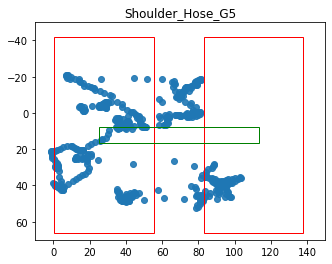

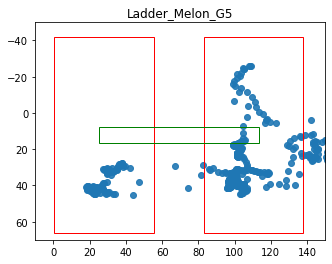

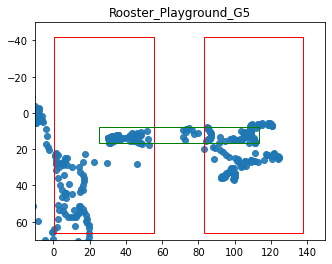

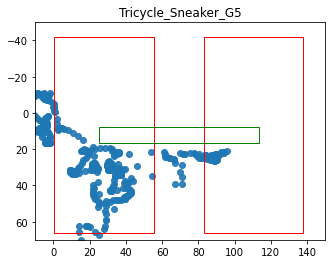

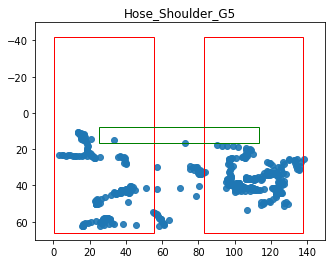

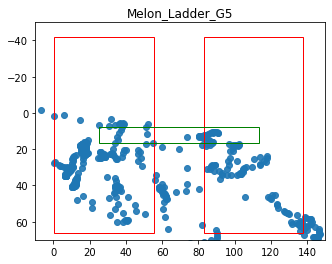

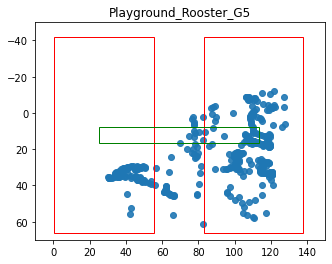

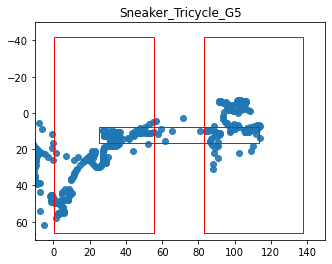

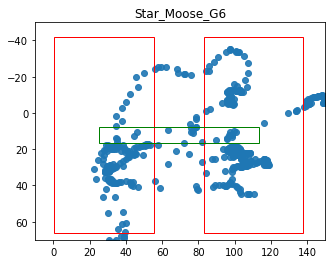

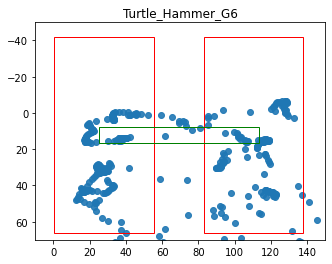

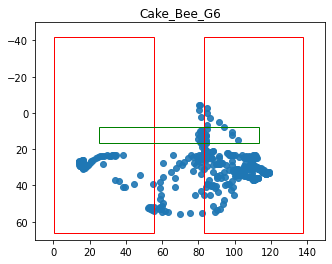

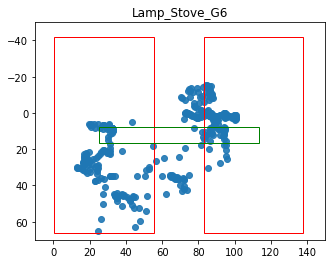

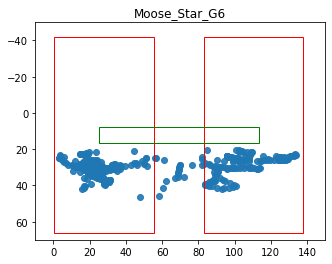

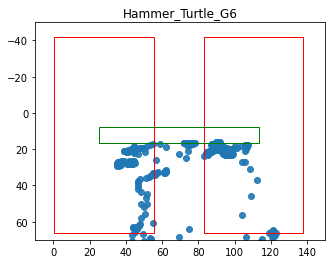

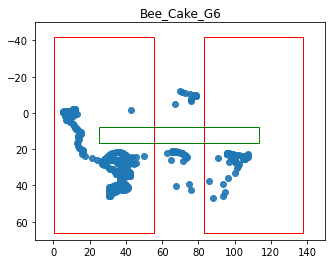

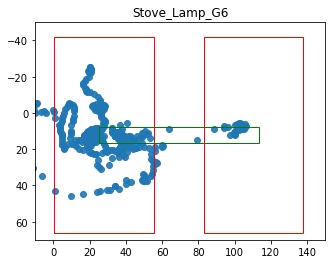

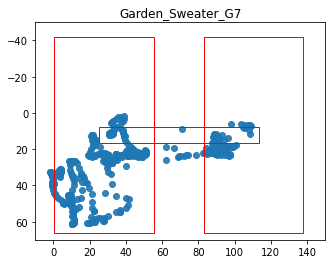

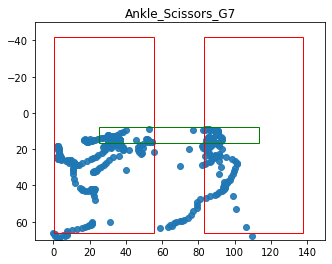

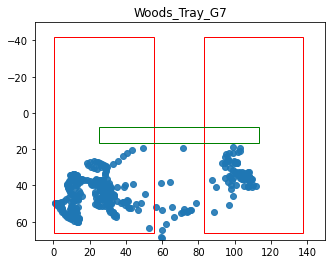

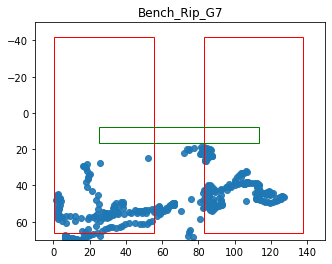

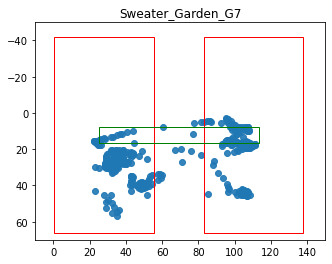

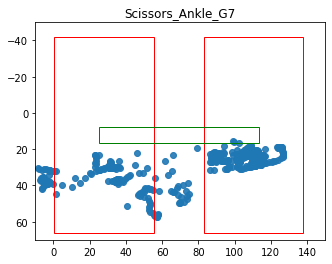

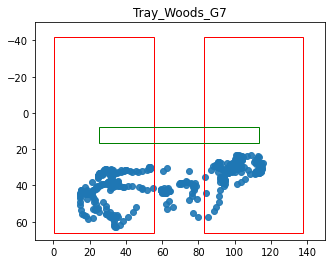

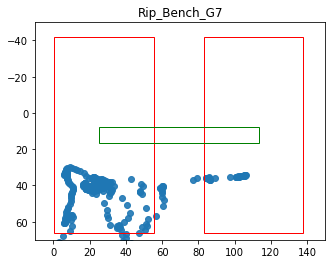

In [35]:
#40
for i in range(24):
    sub = df40.loc[index40[i]]
    #sub =sub[(sub['NewLocation'] == 'away') & (sub['NewOnScreen']=='true')]
    plot_dots(sub, items[i], ss, nss, 0.4)
    

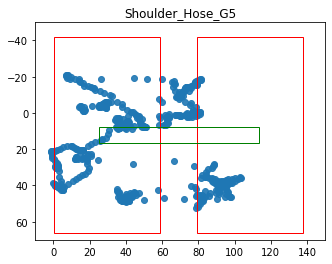

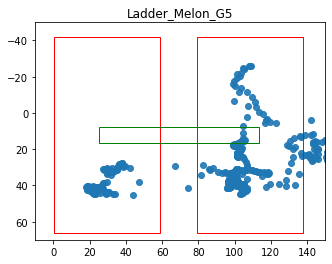

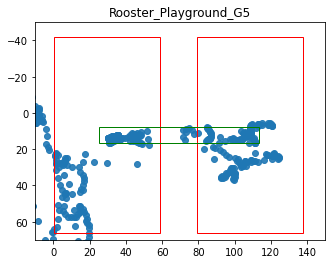

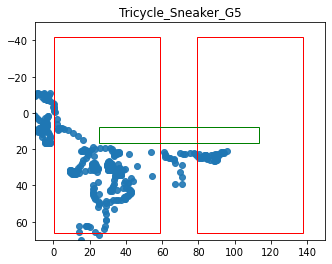

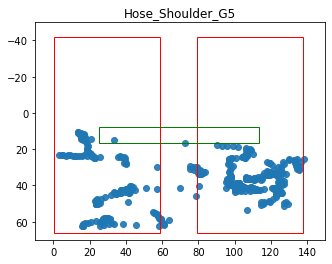

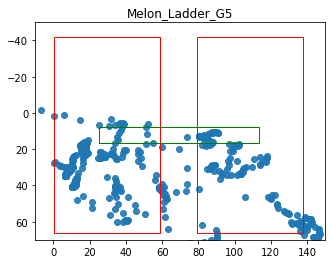

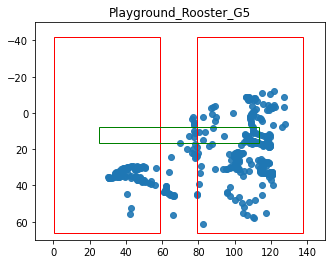

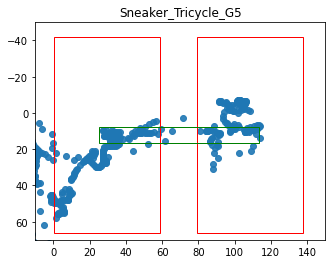

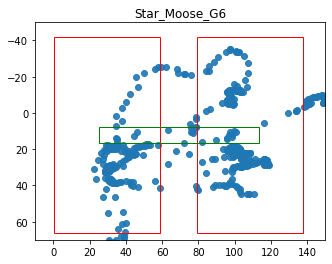

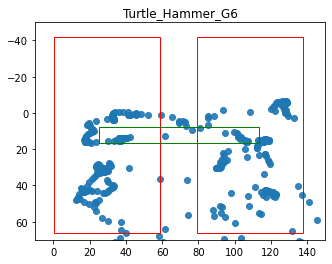

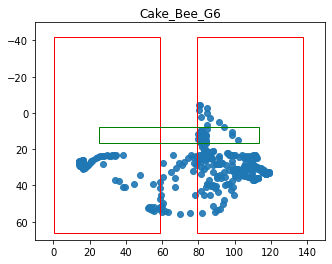

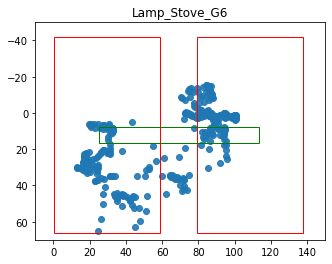

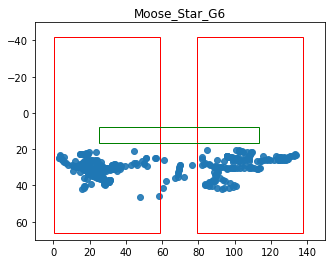

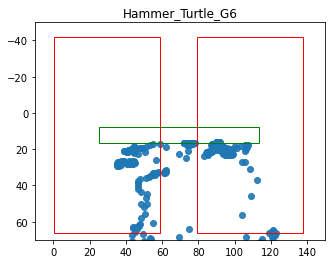

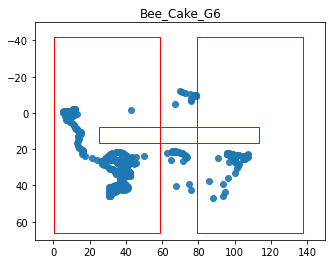

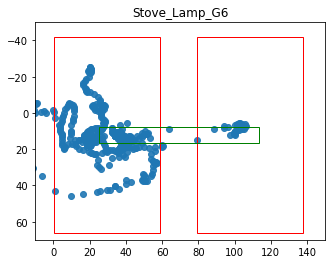

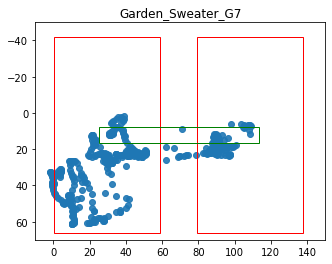

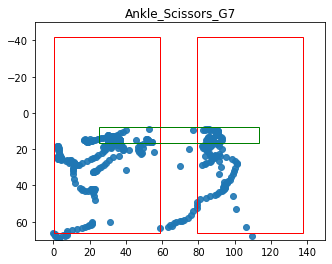

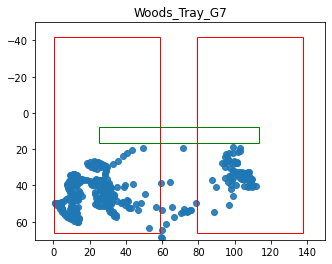

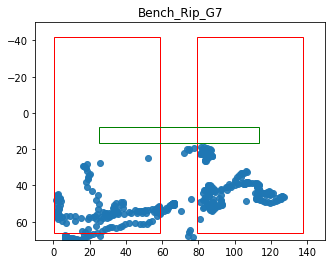

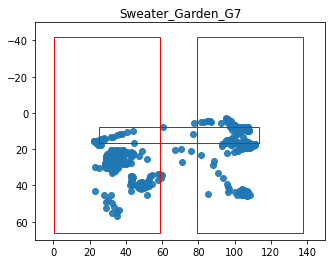

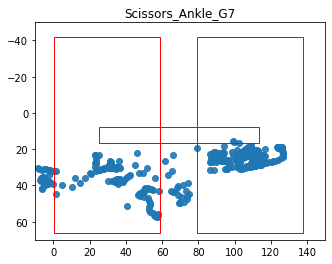

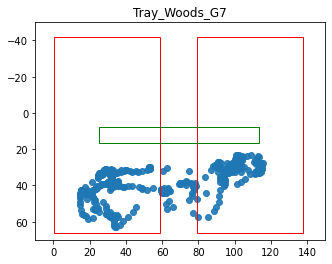

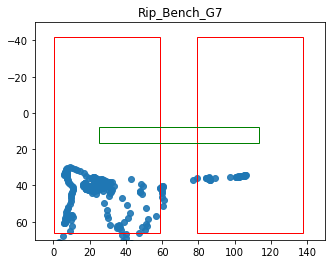

In [36]:
#425

for i in range(24):
    sub = df425.loc[index425[i]]
    #sub =sub[(sub['NewLocation'] == 'away') & (sub['NewOnScreen']=='true')]
    plot_dots(sub, items[i], ss, nss425, 0.425)    
    

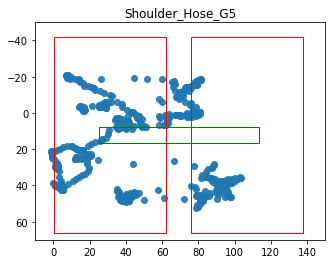

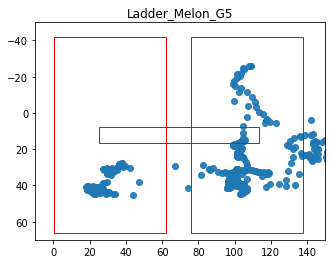

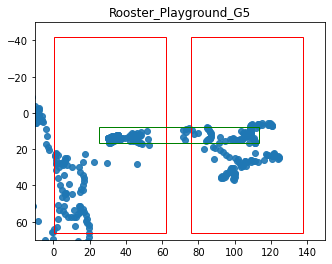

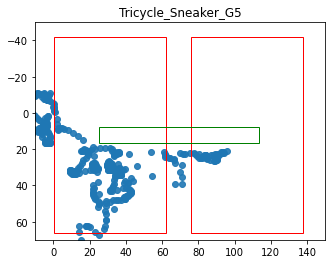

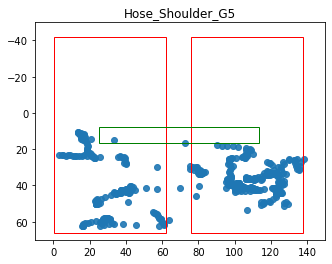

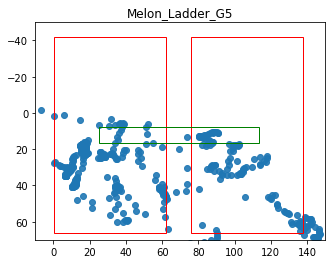

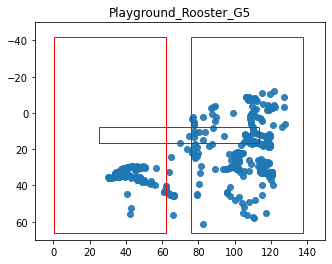

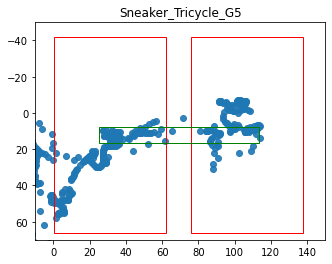

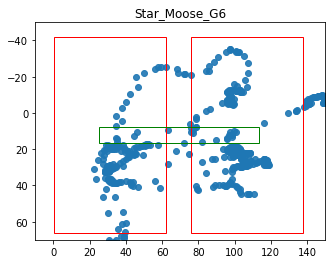

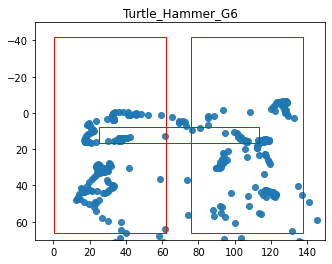

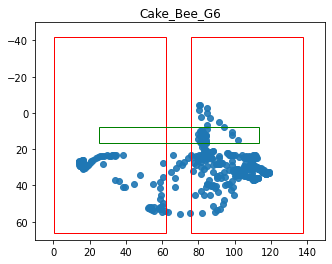

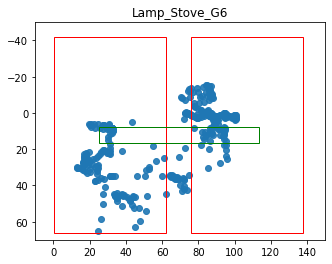

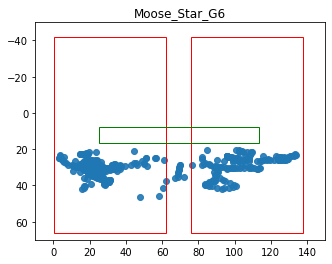

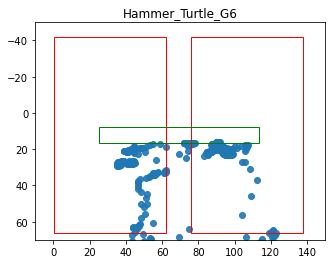

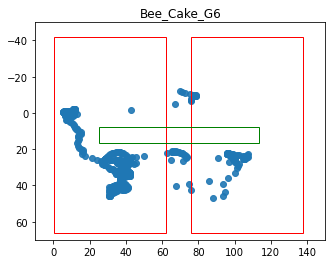

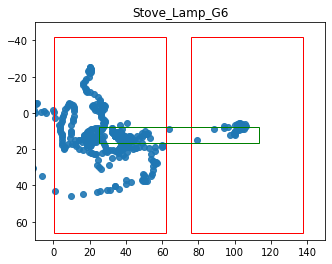

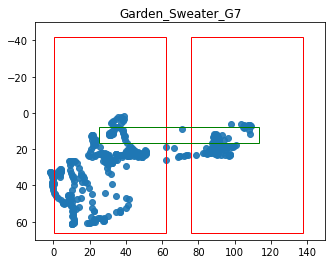

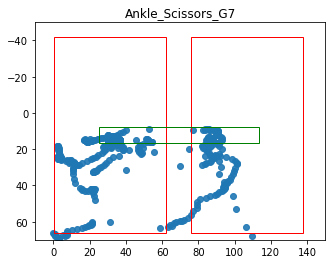

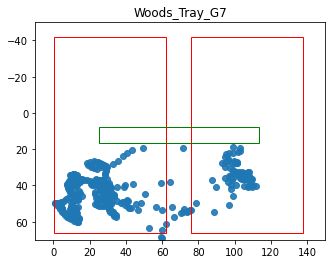

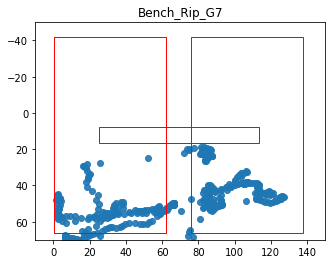

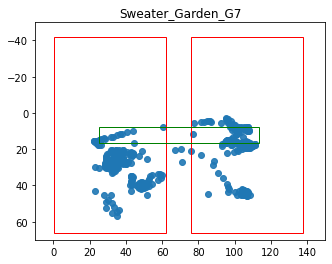

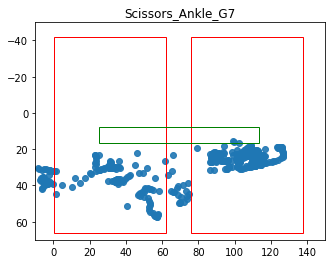

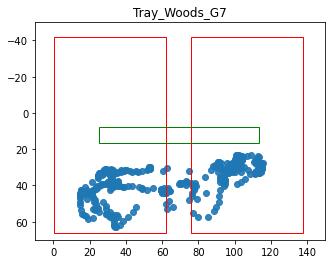

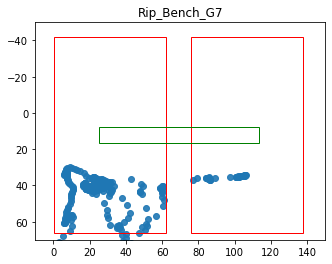

In [37]:
#45
for i in range(24):
    sub = df45.loc[index45[i]]
    #sub =sub[(sub['NewLocation'] == 'away') & (sub['NewOnScreen']=='true')]
    plot_dots(sub, items[i], ss, nss45, 0.45)

# Chi-square test of independence of variables in a contingency table. (for references)

In [ ]:
exp = pd.read_csv('C:/Users/tsb7592/Box/Baby Toolbox Operations/Analysis/count.csv')

In [ ]:
#Getting the tsv counts 
exp =exp.iloc[:,:4]

In [ ]:
l1 =new40.to_numpy()
l2= exp.to_numpy()

In [ ]:
l2

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

for i in range(24):
    data = [l1[i], l2[2]]
    
    stat, p, dof, expected = chi2_contingency(data)
    print(items[i])
    
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    print('')

In [ ]:
from scipy.stats import chisquare
chisq = pd.DataFrame(columns=('items', 'stat','p'))
for i in range(24):
    ob = obs.iloc[i]
    ex = expected.iloc[i]
    stat, pv = chisquare(f_obs=ob, f_exp=ex)
    chisq.loc[i] = [items[i], round(stat,3) ,round(pv,3)]


In [ ]:
chisq.to_csv('C:/Users/TEMP/Box/Baby Toolbox Operations/Analysis/chisquare.csv', index=False)